In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from linear_regression import LinearRegression

In [7]:
# 下载Iris数据集
iris = load_iris()
iris_data = iris.data
iris_target = iris.target
iris_feature_names = iris.feature_names

iris_df = pd.DataFrame(data=iris_data, columns=iris_feature_names)
iris_df['target'] = iris_target

通过 sepal length (cm) 预测 sepal width (cm)
准确率：-0.06550730323513121
------------------------------------------
通过 petal length (cm) 预测 petal width (cm)
准确率：0.9391701972955756
------------------------------------------


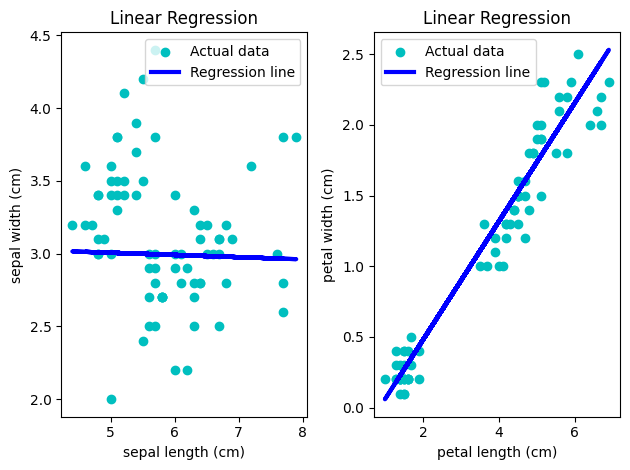

In [8]:
# 线性回归，通过花瓣宽度预测花瓣长度、通过花萼宽度预测花萼长度
model = LinearRegression()
for i in range(2):
    X = iris_df.iloc[:,2*i].values.reshape(-1, 1)       # iris_df[['petal width (cm)']]
    y = iris_df.iloc[:,2*i+1]                           # iris_df['petal length (cm)']
    # 数据集划分
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    # 回归
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # 准确率评估
    print('通过',iris_df.columns[2*i], '预测' , iris_df.columns[2*i+1])
    # mse = mean_squared_error(y_test, y_pred)
    # print(f'均方误差：{mse}')
    # accuracy = 1 - mse/np.var(y_test)
    accuracy=model.score(X_test,y_test)
    print(f'准确率：{accuracy}')
    print('------------------------------------------')
    plt.subplot(1,2,i+1)
    plt.scatter (X_test, y_test,
                color='c',
                label='Actual data')

    plt.plot    (X_test, y_pred, 
                color='blue', 
                linewidth=3, 
                label='Regression line')
    plt.xlabel(iris_df.columns[2*i])
    plt.ylabel(iris_df.columns[2*i+1])
    plt.title('Linear Regression')
    plt.legend()
plt.tight_layout()
plt.show()

准确率：0.9412729421069649


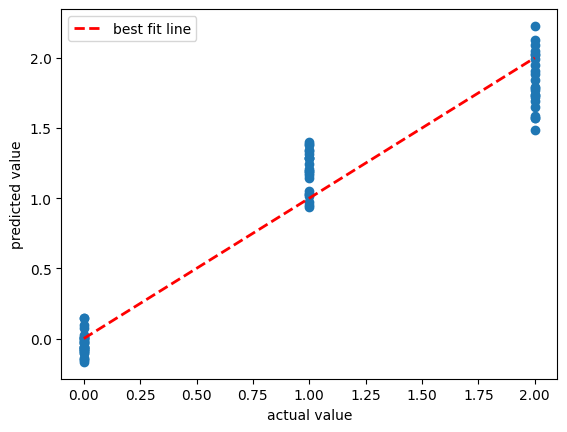

In [9]:
X=iris_data
y=iris_target
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
# 回归
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

score = model.score(X_test,y_test)
print(f'准确率：{score}')

# 绘制散点图
plt.scatter(y_test, y_pred)
plt.xlabel("actual value")
plt.ylabel("predicted value")
# 添加最佳拟合线
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='best fit line')

plt.legend()
plt.show()